<a href="https://colab.research.google.com/github/Obreintelly/Autolib-EDA/blob/main/WEEK_4_HYPOTHESIS_TESTING_AUTOLIB_DATASET_27032021_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB ELECTRIC CAR SHARING DATA ANALYSIS**

# 1. Importing Libraries

In [1]:
#Importing Pandas
import pandas as pd

In [2]:
#Importing Numpy
import numpy as np

In [3]:
#Importing Matplotlib
import matplotlib.pyplot as plt


In [4]:
#Importing Seaborn
import seaborn as sns

# 2. Loading Our Dataset

In [5]:
#dataset = 'http://bit.ly/DSCoreAutolibDataset'

#df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

df= pd.read_csv('http://bit.ly/DSCoreAutolibDataset')



# 3. Previewing Our Dataset

In [6]:
#Displaying first 5 rows of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
#Displaying last 5 rows
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [8]:
#Exploring our dataset
#We check our columns have the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [9]:
#Checking our columns
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [10]:
#Checking our rows
df.index

RangeIndex(start=0, stop=16085, step=1)

# 4. Tidying Up Our Dataset

In [11]:
#Ensuring Consistency in our dataset
#We standardize our columns

df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')
df.columns


Index(['POSTAL_CODE', 'DATE', 'N_DAILY_DATA_POINTS', 'DAYOFWEEK', 'DAY_TYPE',
       'BLUECARS_TAKEN_SUM', 'BLUECARS_RETURNED_SUM', 'UTILIB_TAKEN_SUM',
       'UTILIB_RETURNED_SUM', 'UTILIB_14_TAKEN_SUM', 'UTILIB_14_RETURNED_SUM',
       'SLOTS_FREED_SUM', 'SLOTS_TAKEN_SUM'],
      dtype='object')

In [12]:
df.head(1)

,POSTAL_CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [13]:
#Ensuring validity in our dataset
df['POSTAL_CODE'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [14]:
#Checking the Date column contains only entries for 2018
df['DATE'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [15]:
#Checking for any peculiar values in Number of Daily Data Points
df['N_DAILY_DATA_POINTS'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [16]:
#Checking to ensure the codes for Day week match the dataset description 
df['DAYOFWEEK'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [17]:
#Checking we have the correct Day Type
df['DAY_TYPE'].unique()

array(['weekday', 'weekend'], dtype=object)

In [18]:
#Ensuring Completeness in our dataset
# Are their any missing values?
df.isna().any().any()

False

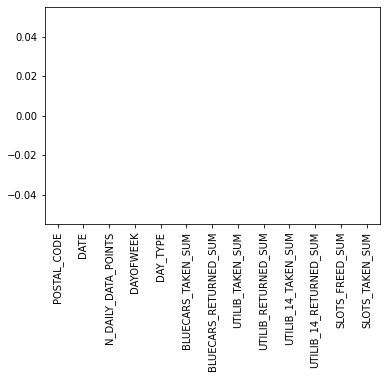

In [19]:
#No missing values in our dataset
df.isna().sum().plot(kind='bar')

In [20]:
#Ensuring Completeness in our dataset
#Are there any duplicates?

df.duplicated().any()

False

In [21]:
#Dropping Columns we do not need to respond to the question
#Since we will be investigating a claim about blue cars, we do not need
# Utilib and Utilib 14

df.drop(['N_DAILY_DATA_POINTS','UTILIB_TAKEN_SUM', 'UTILIB_RETURNED_SUM', 'UTILIB_14_TAKEN_SUM','UTILIB_14_RETURNED_SUM', 'SLOTS_FREED_SUM', 'SLOTS_TAKEN_SUM'], axis=1, inplace=True)

In [22]:
#Displaying our new dataset size
df.shape

(16085, 6)

# 5. Finding Outliers in our dataset & dealing with them

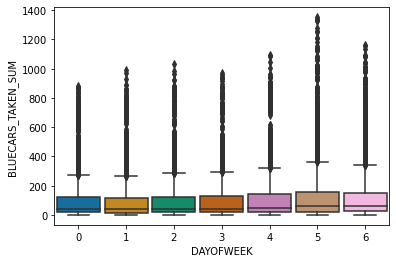

In [23]:
#Checking for Outliers in Our Dataset
bplot =sns.boxplot(y='BLUECARS_TAKEN_SUM', x='DAYOFWEEK', data= df,  width=0.9, palette='colorblind')

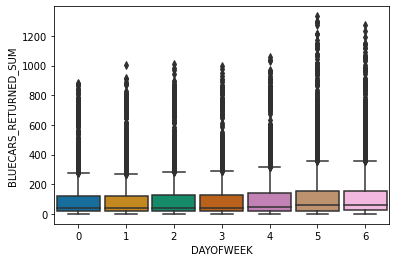

In [24]:
#Checking for outliers in Bluecars Returned
bplot =sns.boxplot(y='BLUECARS_RETURNED_SUM', x='DAYOFWEEK', data= df,  width=0.9, palette='colorblind')

In [25]:
df['BLUECARS_TAKEN_SUM'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [26]:
#We have outliers in our dataset
#However, we do not cure them as the consequences of curing them will be dire than inaction
#

#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [27]:
#Investigating the impact of our cure

df.skew()

POSTAL_CODE             -1.168778
DAYOFWEEK                0.018824
BLUECARS_TAKEN_SUM       2.406355
BLUECARS_RETURNED_SUM    2.412085
dtype: float64

In [28]:
df['BLUECARS_TAKEN_SUM'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [29]:
#Displaying our new dataset size
df.shape

(16085, 6)

In [30]:
#Ensuring Uniformity in our dataset
#Change the Date into the correct data type

df['DATE']= pd.to_datetime(df['DATE'])
df['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: DATE, Length: 16085, dtype: datetime64[ns]

# 6. Saving our Clean Dataset

In [31]:
df.to_csv('utilib.csv', index=False)

In [32]:
#Loading our dataset

utilib= pd.read_csv('/content/utilib.csv')

utilib.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117


# 7. Univariate Analysis

In [33]:
#Descriptive Statistics of Bluecars Returned
df['BLUECARS_RETURNED_SUM'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BLUECARS_RETURNED_SUM, dtype: float64

In [34]:
# An average of 51 bluecars are returned on a daily basis
#The most number of cars returned on a day is 306

In [35]:
#Descriptive Statistics of Bluecars Returned
df['BLUECARS_RETURNED_SUM'].mode()

0    13
dtype: int64

In [36]:
#Determining Skeweness of Blue Cars Returned
df['BLUECARS_RETURNED_SUM'].skew()

2.412084978838923

In [37]:
df['BLUECARS_RETURNED_SUM'].kurt()

6.1862880957582345

In [38]:
#Descriptive Statistics of Bluecars Taken
df['BLUECARS_TAKEN_SUM'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [39]:
df['BLUECARS_TAKEN_SUM'].mode()

0    12
dtype: int64

In [40]:
df['BLUECARS_TAKEN_SUM'].skew()

2.4063548974959086

In [41]:
df['BLUECARS_TAKEN_SUM'].kurt()

6.172692305510042

Text(0.5, 1.0, 'Distribution of taken bluecars in a week in 2018')

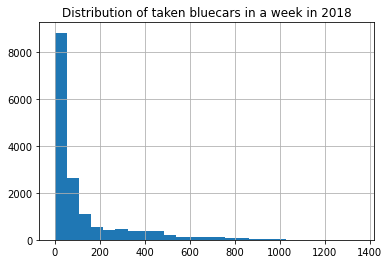

In [42]:
#Plotting a histogram of the total cars taken in a week

df['BLUECARS_TAKEN_SUM'].hist(bins=25)
plt.title('Distribution of taken bluecars in a week in 2018')

Text(0.5, 1.0, 'Distribution of returned bluecars in a week in 2018')

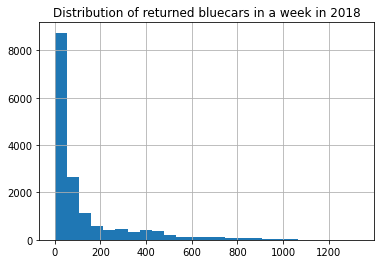

In [43]:
#Plotting a histogram of the total cars returned in a week

df['BLUECARS_RETURNED_SUM'].hist(bins=25)
plt.title('Distribution of returned bluecars in a week in 2018')

Text(0.5, 1.0, 'Percentage Breakdown of Weekdays Vs Weekends')

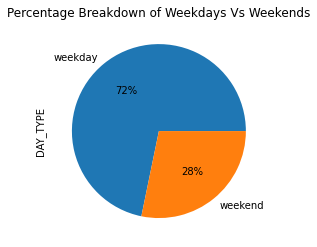

In [44]:
#Pie-chart showing breakdown btn weekdays vs weekends

df['DAY_TYPE'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage Breakdown of Weekdays Vs Weekends')

# 8. Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


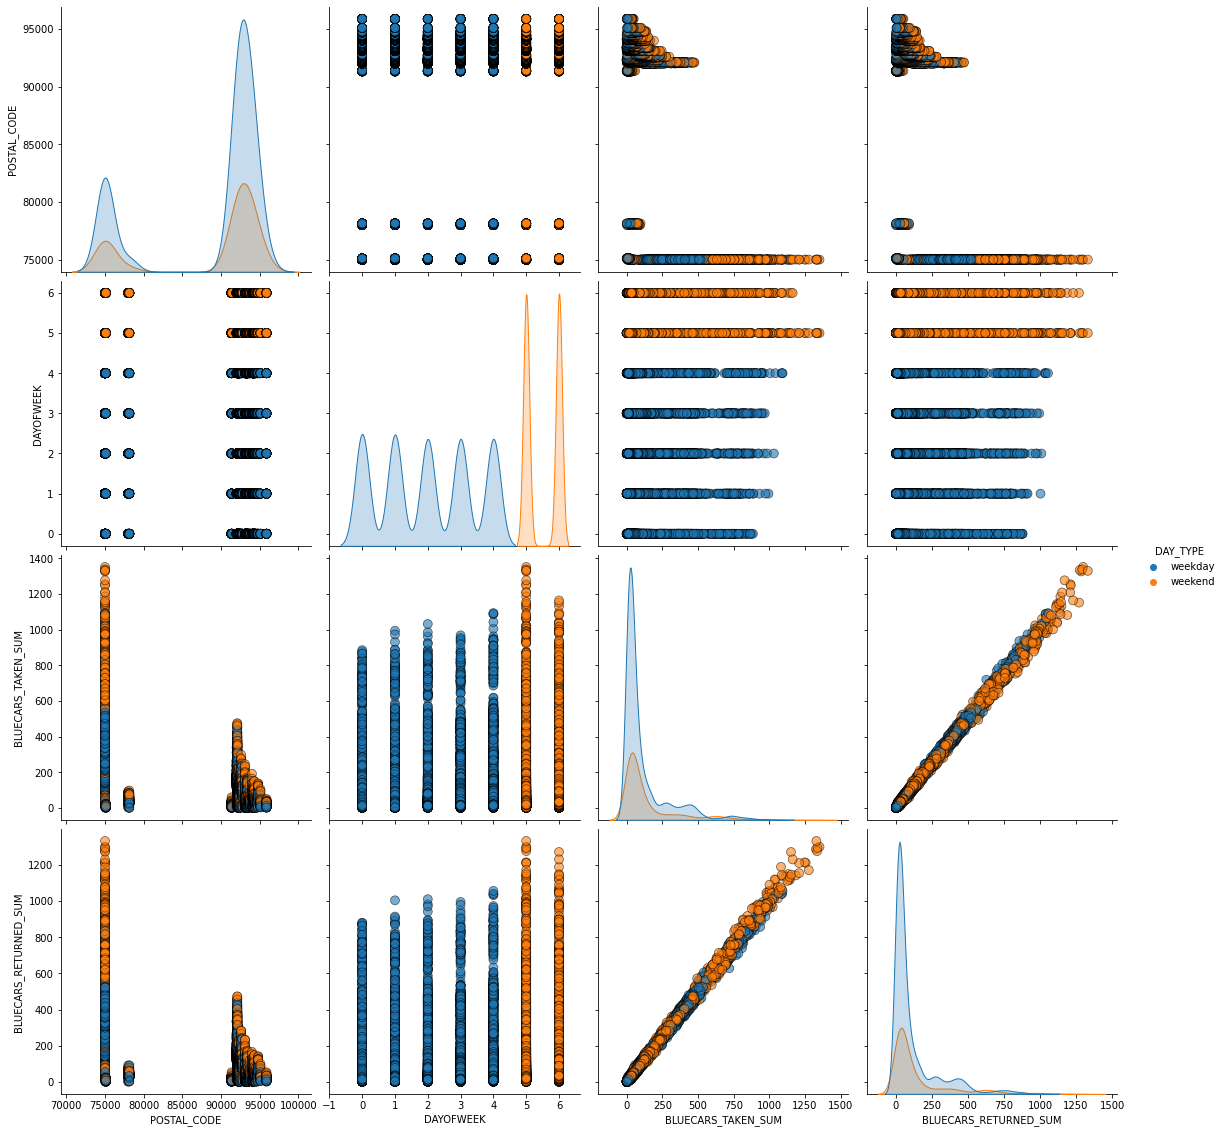

In [45]:
#Crossplots

sns.pairplot(df, hue='DAY_TYPE', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size= 4 )

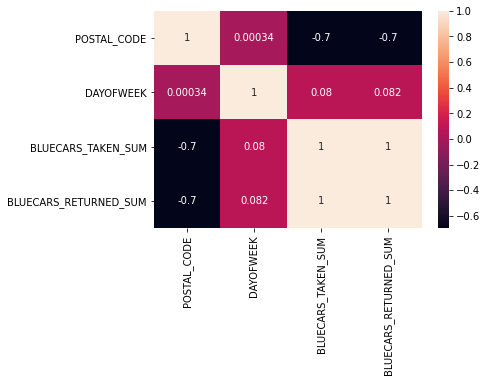

In [46]:
#General Overview of our dataset using heatmaps
#Heatmap below shows how the various variables correlate
sns.heatmap(df.corr(),annot=True)
plt.show()

In [47]:
weekdays_only = df[df['DAY_TYPE']=='weekday']
weekdays_only

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117
...,...,...,...,...,...,...
16078,95880,2018-06-13,2,weekday,12,13
16079,95880,2018-06-14,3,weekday,15,13
16080,95880,2018-06-15,4,weekday,15,10
16083,95880,2018-06-18,0,weekday,11,14


In [48]:
# Mean of cars picked on a weekday
picked_weekdays_mean = weekdays_only['BLUECARS_TAKEN_SUM'].mean()
picked_weekdays_mean

116.0286729036729

In [49]:
weekends_only= df[df['DAY_TYPE']=='weekend']
weekends_only.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
5,75001,2018-01-06,5,weekend,187,185
6,75001,2018-01-07,6,weekend,180,180
12,75001,2018-01-13,5,weekend,224,223
13,75001,2018-01-14,6,weekend,193,193
19,75001,2018-01-20,5,weekend,217,217


In [50]:
saturday= weekends_only[weekends_only['DAYOFWEEK']==5]
saturday.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
5,75001,2018-01-06,5,weekend,187,185
12,75001,2018-01-13,5,weekend,224,223
19,75001,2018-01-20,5,weekend,217,217
26,75001,2018-01-27,5,weekend,216,218
33,75001,2018-02-03,5,weekend,199,204


In [51]:
saturday.shape

(2267, 6)

In [52]:
sat_pick =saturday['BLUECARS_TAKEN_SUM']

In [53]:
sunday= weekends_only[weekends_only['DAYOFWEEK']==6]
sunday.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
6,75001,2018-01-07,6,weekend,180,180
13,75001,2018-01-14,6,weekend,193,193
20,75001,2018-01-21,6,weekend,143,150
27,75001,2018-01-28,6,weekend,190,189
34,75001,2018-02-04,6,weekend,186,180


In [54]:
sunday.shape

(2274, 6)

In [55]:
sun_pick= sunday['BLUECARS_TAKEN_SUM']

In [59]:
#Randomly picking two postcodes on the weekend and determine 
#whether they'll have the same mean of the total number of BlueCars picked


# Sorting Postal Codes
POSTAL_CODE= np.sort(weekends_only['POSTAL_CODE'].unique())
POSTAL_CODE

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [73]:
# Randomly Selecting 2 Postal Codes from the Weekend Dataset
import random

#Seeding
random.seed(2)

#Picking our random Postal Codes
print(random.sample(list(POSTAL_CODE), k=2))

[75008, 75012]


In [74]:
#Saving our Randomly Selected Postal Codes
POSTAL_CODE_SAMPLE1= 75008
POSTAL_CODE_SAMPLE2= 75012

In [76]:
#Selecting only weekend data from the two postal codes
weekend_post = weekends_only.loc[(weekends_only['POSTAL_CODE']==POSTAL_CODE_SAMPLE1)| (weekends_only['POSTAL_CODE'] == POSTAL_CODE_SAMPLE2) ]
weekend_post

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
1097,75008,2018-01-06,5,weekend,442,456
1098,75008,2018-01-07,6,weekend,398,411
1104,75008,2018-01-13,5,weekend,525,532
1105,75008,2018-01-14,6,weekend,471,492
1111,75008,2018-01-20,5,weekend,520,545
...,...,...,...,...,...,...
1855,75012,2018-06-03,6,weekend,680,686
1861,75012,2018-06-09,5,weekend,727,724
1862,75012,2018-06-10,6,weekend,687,696
1868,75012,2018-06-16,5,weekend,734,707


# 9. Carrying Out Hypothesis Testing on Claim One

Ho: μ of Total BlueCars on any random PostCode on a weekend = μ of Total BlueCars on any other random PostCode on a weekend

H1: μ of Total BlueCars on any random PostCode on a weekend != μ of Total BlueCars on any other random PostCode on a weekend


Ho:  μ of 75008 =  μ of 75012

H1:  μ of 75008 !=  μ of 75012

In [79]:
# Grouping Postal Codes and BlueCars Taken
new_df = weekend_post[['POSTAL_CODE', 'BLUECARS_TAKEN_SUM']]
new_df

,POSTAL_CODE,BLUECARS_TAKEN_SUM
1097,75008,442
1098,75008,398
1104,75008,525
1105,75008,471
1111,75008,520
...,...,...
1855,75012,680
1861,75012,727
1862,75012,687
1868,75012,734


In [82]:
#Subsecting the postcodes 
post_code1= new_df[new_df['POSTAL_CODE']==75008]
post_code2= new_df[new_df['POSTAL_CODE']==75012]

In [84]:
#Checking Shape of our datasets
print(post_code1.shape)
print(post_code2.shape)

(44, 2)
(44, 2)


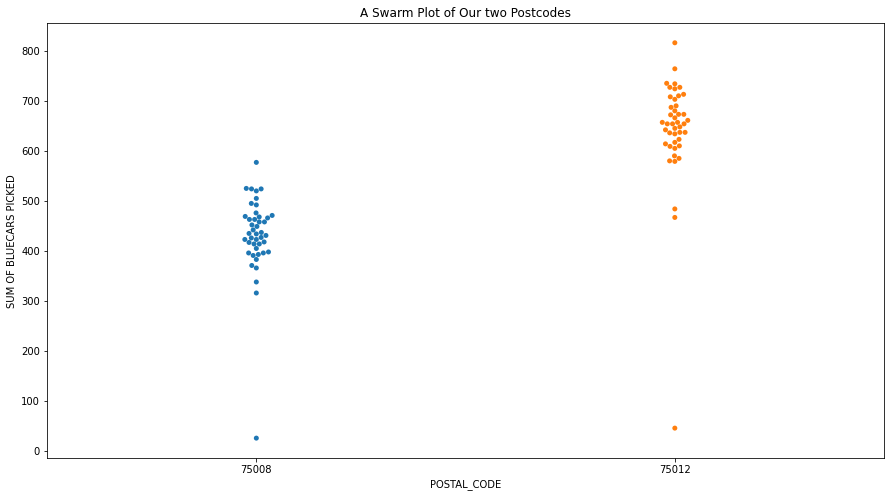

In [99]:
#COnstructing a Bee SwarmPlot of the Postal Codes
# We can tell that our two randomly selected postcodes appear to follow a normal distribution.
fig, ax = plt.subplots(figsize=(15,8))
sns.swarmplot(x='POSTAL_CODE' , y='BLUECARS_TAKEN_SUM' , data=new_df) 
plt.xlabel('POSTAL_CODE') 
plt.ylabel('SUM OF BLUECARS PICKED')
plt.title('A Swarm Plot of Our two Postcodes')
plt.show()


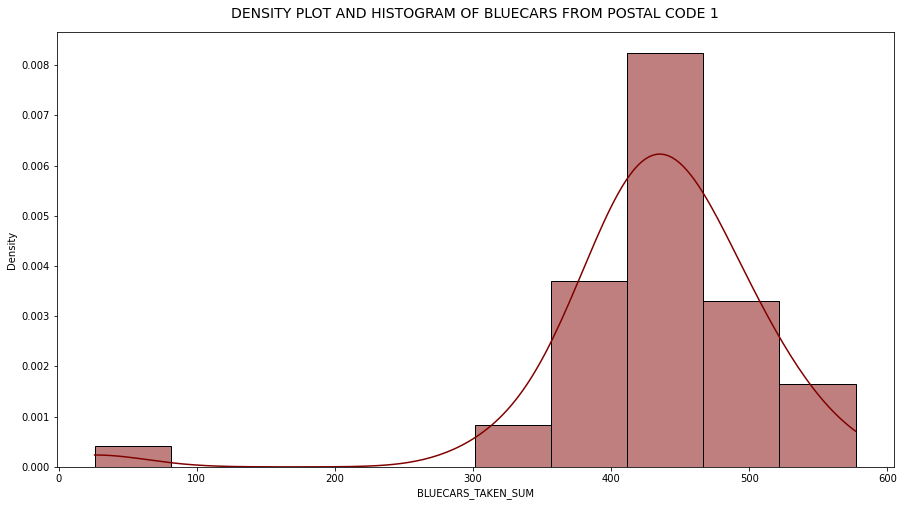

In [100]:
#Visualizing the Normality of the First Postal Code
# Specifying the size of the graph
fig, ax = plt.subplots(figsize=(15,8))

# Ploting density plot and histogram of the number of cars taken from station with postal code 75015
sns.histplot(post_code1['BLUECARS_TAKEN_SUM'], kde=True, stat="density",color='maroon', bins=10)

# Label the graph
plt.title('DENSITY PLOT AND HISTOGRAM OF BLUECARS FROM POSTAL CODE 1', fontsize=14, y=1.018)

plt.show()

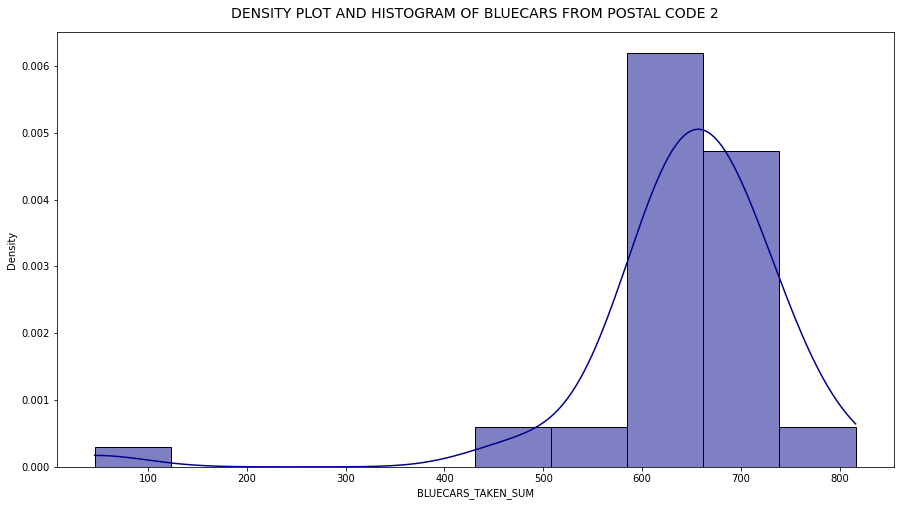

In [101]:
#Visualizing the Normality of the Second Post COde
# Specifying the size of the graph
fig, ax = plt.subplots(figsize=(15,8))

# Ploting density plot and histogram of the number of cars taken from station with postal code 75015
sns.histplot(post_code2['BLUECARS_TAKEN_SUM'], kde=True, stat="density",color='darkblue', bins=10)

# Label the graph
plt.title('DENSITY PLOT AND HISTOGRAM OF BLUECARS FROM POSTAL CODE 2', fontsize=14, y=1.018)

plt.show()

In [ ]:
#Given that our Sample follows a normal distribution, we can carry out the hypothesis test using the z-test 
#since our size is greater than 30

#Specifying our alpha at 5%

In [102]:
#Carrying out the test
from scipy import stats
from statsmodels.stats import weightstats as stests

#Carrying out the ztest
ztest ,p_value = stests.ztest(post_code1.BLUECARS_TAKEN_SUM, x2=post_code2.BLUECARS_TAKEN_SUM, value=0,alternative='two-sided')
ztest, p_value

#Defining the significance level at 0.05
alpha = 0.05 
if p_value < alpha:
    print("We Reject the null hypothesis")
else:
    print("We Dot Reject the null hypothesis")

We Reject the null hypothesis


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# We reject the null hypothesis that any two randomly selected postcodes will have the same mean total of BlueCars picked on a weekend. 

# 10. Hypothesis Testing on Claim 2
Sunday is the busier than the weekdays

# Null Hypothesis:
 Ho: mean of Bluecars picked on Sunday = mean of Bluecars picked on weekdays


#Alternative Hypothesis
 H1: mean of Bluecars picked on Sunday != mean of Bluecars picked on weekdays


 Ho: mean on Sunday = 47.16

 H1: mean on Sunday != 47.16

In [ ]:
# Having defined the Null and ALternative Hypothesis, we set the level of significance
# alpha = 0.05

# 11. Sampling

In [ ]:
#Before carrying out the Hypothesis Test,
#We need to select a sampling technique
#and then select samples.

#10% of the total entries on SUnday would be a good sample size
#Selecting a sample for Sunday

sunday_sample =sunday.sample(n=168, replace="False")
sunday_sample

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
9728,92700,2018-03-18,6,weekend,109,122
9274,92420,2018-04-01,6,weekend,10,4
6555,92240,2018-01-07,6,weekend,89,106
11762,93360,2018-04-29,6,weekend,28,28
10792,93200,2018-03-25,6,weekend,9,5
...,...,...,...,...,...,...
7246,92290,2018-03-18,6,weekend,12,10
14599,94300,2018-03-18,6,weekend,86,91
6026,92200,2018-04-15,6,weekend,59,59
8741,92390,2018-01-21,6,weekend,17,12


In [ ]:
#Summary Statistics in our Sample
sunday_sample.describe()

,POSTAL_CODE,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
count,168.000000,168.0,168.000000,168.000000
mean,93052.500000,6.0,64.136905,65.755952
std,937.008714,0.0,56.902262,59.797212
min,91330.000000,6.0,1.000000,2.000000
25%,92240.000000,6.0,24.000000,22.000000
50%,92650.000000,6.0,51.000000,53.000000
75%,94100.000000,6.0,81.250000,86.000000
max,95870.000000,6.0,271.000000,288.000000


In [ ]:
#Summary Statistics of our weekday data
weekdays_only.describe()

,POSTAL_CODE,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
count,8639.000000,8639.000000,8639.000000,8639.000000
mean,93091.108925,1.972219,47.156615,47.258132
std,1005.958825,1.417784,47.876180,47.353433
min,91330.000000,0.000000,0.000000,0.000000
25%,92270.000000,1.000000,15.000000,15.000000
50%,93100.000000,2.000000,31.000000,31.000000
75%,94000.000000,3.000000,62.000000,61.000000
max,95880.000000,4.000000,302.000000,306.000000


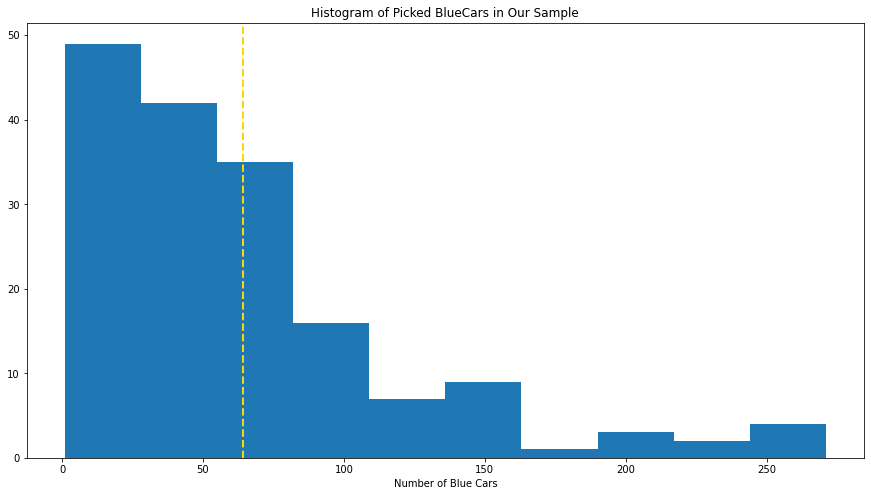

In [ ]:
#Visualizing the Normality of the Distribution
plt.figure(figsize=(15,8))
plt.hist(sunday_sample.BLUECARS_TAKEN_SUM)
plt.axvline(sunday_sample.BLUECARS_TAKEN_SUM.mean(), color='gold', linestyle='dashed', linewidth=2)
plt.title('Histogram of Picked BlueCars in Our Sample')
plt.xlabel('Number of Blue Cars')
plt.show()

**Implementing the Z-test**

In [ ]:
from scipy import stats
from statsmodels.stats import weightstats as stests

#Carrying out the ztest
ztest ,p_value = stests.ztest(sunday_sample.BLUECARS_TAKEN_SUM, x2=weekdays_only.BLUECARS_TAKEN_SUM, value=0,alternative='two-sided')
ztest, p_value

#Defining the significance level at 0.05
alpha = 0.05 
if p_value < alpha:
    print("We Reject the null hypothesis")
else:
    print("We Dot Reject the null hypothesis")

We Reject the null hypothesis


In [ ]:
#Conclusion & Interpretation
# There is sufficient evidence to prove that the average number of cars picked on Sunday varies from the number picked on a weekday. 